In [1]:
%matplotlib inline
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
from sklearn.decomposition import PCA

In [ ]:
train_set = pd.read_csv('../../train.csv', parse_dates=['srch_ci', 'srch_co'])

In [ ]:
train_set.describe()

In [ ]:
users_group = train_set.groupby('user_id')
bookings = users_group.aggregate({'is_booking':np.sum})
print np.sum(bookings)

In [ ]:
train_set['num_days'] = (train_set['srch_co'] - train_set['srch_ci'])\
                                                            .values.astype('timedelta64[D]').astype(int)

## Get the top 10000 users with most transactions

In [ ]:
filtered_user_ids_10k = list(train_set['user_id'].value_counts()[0:10000].index)

In [ ]:
train_set['user_id'].value_counts()[0:10000].tail(5)

In [ ]:
filtered_train_set_10k = train_set[train_set['user_id'].isin(filtered_user_ids_10k)]

In [ ]:
filtered_train_set_10k.describe()

In [ ]:
filtered_train_set_10k['srch_ci'] = pd.to_datetime(filtered_train_set_10k['srch_ci'])
filtered_train_set_10k['srch_co'] = pd.to_datetime(filtered_train_set_10k['srch_co'])

In [ ]:
temp = pd.to_datetime(filtered_train_set_10k['srch_ci'],errors = 'ignore')
filtered_train_set_10k['srch_ci'] = temp
temp = pd.to_datetime(filtered_train_set_10k['srch_co'],errors = 'ignore')
filtered_train_set_10k['srch_co'] = temp

In [ ]:
filtered_train_set_10k['num_days'] = (filtered_train_set_10k['srch_co'] - filtered_train_set_10k['srch_ci'])\
                                                            .values.astype('timedelta64[D]').astype(int)

In [ ]:
filtered_train_set_10k['num_days'] = filtered_train_set_10k['num_days'].apply(lambda x: abs(x))

In [ ]:
filtered_train_set_1k ['num_days'] = \
 (filtered_train_set_1k['srch_co'] - filtered_train_set_1k['srch_ci']).values.astype('timedelta64[D]').astype(int)

In [ ]:
erroneous = filtered_train_set_10k[filtered_train_set_10k['num_days'] < 0]
len(erroneous)

In [ ]:
filtered_train_set_10k = filtered_train_set_10k[filtered_train_set_10k['num_days'] >= 0] 

In [ ]:
temp = pd.to_datetime(train_set['srch_ci'],errors = 'coerce')
train_set['srch_ci'] = temp
temp = pd.to_datetime(train_set['srch_co'],errors = 'coerce')
train_set['srch_co'] = temp

In [ ]:
temp = pd.to_datetime(test_data['srch_ci'],errors = 'coerce')
test_data['srch_ci'] = temp
temp = pd.to_datetime(test_data['srch_co'],errors = 'coerce')
test_data['srch_co'] = temp

In [ ]:
test_data['num_days'] = (test_data['srch_co'] - test_data['srch_ci'])\
                                                            .values.astype('timedelta64[D]').astype(int)

In [ ]:
filtered_train_set_10k = filtered_train_set_10k.drop('hours_to_checkin',axis=1)

In [ ]:
filtered_train_set_10k['date_time'] = pd.to_datetime(filtered_train_set_10k["date_time"])

In [ ]:
filtered_train_set_10k['num_days_to_checkin'] = \
            (filtered_train_set_10k['srch_ci'] - filtered_train_set_10k['date_time'])\
                            .values.astype('timedelta64[D]').astype(int)

In [ ]:
(filtered_train_set_10k['num_days_to_checkin'] < 0).sum()

In [ ]:
filtered_train_set_10k['num_days_to_checkin'].describe()

In [ ]:
filtered_train_set_10k['num_days'] = filtered_train_set_10k['num_days'].apply(lambda x: abs(x))

In [ ]:
filtered_train_set_10k['month'] = filtered_train_set_10k['date_time'].apply(lambda x: x.month)

In [ ]:
len(filtered_train_set_10k)

In [ ]:
filtered_train_set_10k = filtered_train_set_10k[filtered_train_set_10k['num_days_to_checkin']<366]
print len(filtered_train_set_10k)

In [ ]:
filtered_train_set_10k = filtered_train_set_10k[filtered_train_set_10k['num_days'] < 365]

In [ ]:
filtered_train_set_10k = filtered_train_set_10k.dropna()

In [ ]:
filtered_train_set_10k['log2_orig_destination_distance'] = \
                ((np.log2(filtered_train_set_10k['orig_destination_distance'])).round() + 7)

In [ ]:
print filtered_train_set_10k['log2_orig_destination_distance'].hist()
print len(filtered_train_set_10k)

In [ ]:
filtered_train_set_10k['log1p_num_days_to_checkin'] = \
            (np.log1p(filtered_train_set_10k['num_days_to_checkin'])*10).round()

In [ ]:
filtered_train_set_10k['log1p_num_days'] =  \
            ((np.log1p(filtered_train_set_10k['num_days']))*10).round()

## PCA Model - destinations.csv

In [3]:
destinations = pd.read_csv('../../destinations.csv')
cols = list(destinations.columns)
cols.remove('srch_destination_id')
destinations[cols] = (destinations[cols] - destinations[cols].mean())/(destinations[cols].max() - destinations[cols].min())
destinations.describe()

,srch_destination_id,d1,d2,d3,d4,d5,d6,d7,d8,d9,...,d140,d141,d142,d143,d144,d145,d146,d147,d148,d149
count,62106.000000,6.210600e+04,6.210600e+04,6.210600e+04,6.210600e+04,6.210600e+04,6.210600e+04,6.210600e+04,6.210600e+04,6.210600e+04,...,6.210600e+04,6.210600e+04,6.210600e+04,6.210600e+04,6.210600e+04,6.210600e+04,6.210600e+04,6.210600e+04,6.210600e+04,6.210600e+04
mean,32359.463884,3.769012e-14,8.540906e-15,2.532259e-14,1.196724e-14,1.173779e-14,5.656482e-15,4.071065e-15,7.135685e-15,2.451121e-14,...,2.132085e-14,1.387706e-14,1.604466e-15,3.957266e-14,7.015156e-15,2.027350e-14,1.756181e-14,1.669023e-14,2.423206e-14,4.862867e-15
std,18711.765765,3.851349e-02,3.086929e-02,5.318681e-02,4.831364e-02,6.221172e-02,1.196388e-01,3.248140e-02,4.618837e-02,1.303436e-01,...,4.855171e-02,3.501144e-02,3.539789e-02,4.402659e-02,4.721344e-02,4.383877e-02,3.859726e-02,4.449992e-02,4.047857e-02,3.623158e-02
min,0.000000,-4.030637e-01,-3.523737e-01,-6.158534e-01,-5.572436e-01,-4.794078e-01,-2.634597e-01,-3.919069e-01,-5.914695e-01,-2.553709e-01,...,-5.443546e-01,-2.773947e-01,-3.563762e-01,-5.204013e-01,-5.330230e-01,-5.368517e-01,-3.508578e-01,-5.419945e-01,-4.862797e-01,-4.030920e-01
25%,16320.250000,-1.540789e-02,-1.303317e-02,-2.160876e-02,-2.029969e-02,-2.881592e-02,-9.616389e-02,-1.362535e-02,-2.005027e-02,-5.920717e-02,...,-2.029983e-02,-1.123591e-02,-1.300062e-02,-1.870276e-02,-1.868932e-02,-1.968206e-02,-1.404435e-02,-1.902340e-02,-1.681373e-02,-1.447805e-02
50%,32277.500000,7.921078e-03,7.221740e-03,1.616204e-02,6.980763e-03,-1.574933e-02,-3.831154e-02,8.286065e-03,1.299600e-02,-4.572223e-02,...,1.549440e-02,3.736461e-03,7.950042e-03,1.227201e-02,1.175798e-02,1.276248e-02,7.215349e-03,1.424315e-02,1.298144e-02,7.271008e-03
75%,48467.750000,1.856394e-02,1.773560e-02,3.635006e-02,2.015926e-02,7.687113e-03,6.093686e-02,1.959413e-02,3.035996e-02,-1.039945e-02,...,3.396590e-02,1.118648e-02,1.846390e-02,2.861707e-02,2.677044e-02,2.951115e-02,1.801529e-02,3.247444e-02,2.926946e-02,1.825448e-02
max,64993.000000,5.969363e-01,6.476263e-01,3.841466e-01,4.427564e-01,5.205922e-01,7.365403e-01,6.080931e-01,4.085305e-01,7.446291e-01,...,4.556454e-01,7.226053e-01,6.436238e-01,4.795987e-01,4.669770e-01,4.631483e-01,6.491422e-01,4.580055e-01,5.137203e-01,5.969080e-01


In [4]:
pca = PCA()
dest_small = pca.fit_transform(destinations[["d{0}".format(i + 1) for i in range(149)]])
dest_small = pd.DataFrame(dest_small)
dest_small["srch_destination_id"] = destinations["srch_destination_id"]

In [ ]:
pca = PCA(n_components=3)
dest_small = pca.fit_transform(destinations[["d{0}".format(i + 1) for i in range(149)]])
dest_small = pd.DataFrame(dest_small,columns=['dest1','dest2','dest3'])
dest_small["srch_destination_id"] = destinations["srch_destination_id"]

In [14]:
 cum_sum = np.cumsum(pca.explained_variance_ratio_)

In [20]:
print (cum_sum[4]-cum_sum[3])/cum_sum[4]

0.028796608815


In [22]:
print cum_sum

[ 0.54139786  0.61491667  0.65553401  0.6777846   0.69788122  0.71514223
  0.72942456  0.7427447   0.75329409  0.76265707  0.77129153  0.77932621
  0.78681956  0.79402054  0.80063224  0.80687492  0.81275526  0.81840918
  0.8236902   0.82882541  0.83368147  0.83847128  0.8429306   0.84726164
  0.8515635   0.85551339  0.85938729  0.86311719  0.86677206  0.87029165
  0.87376933  0.87711502  0.88035775  0.88346324  0.88652366  0.88955326
  0.8924115   0.89523846  0.89798367  0.90066037  0.90323263  0.905756
  0.90821169  0.91062212  0.91293729  0.91523681  0.91746565  0.91965085
  0.92173312  0.92373244  0.92571377  0.92766621  0.92957094  0.93138878
  0.93309272  0.93477199  0.93645046  0.93808218  0.93966343  0.94120744
  0.94270135  0.94417539  0.94561374  0.94702725  0.9484173   0.94979314
  0.9511452   0.95245104  0.95374204  0.95501443  0.95626123  0.95748548
  0.95868955  0.95986674  0.96102992  0.96214436  0.96324283  0.9643214
  0.96538649  0.96643466  0.96747749  0.968496    0.96

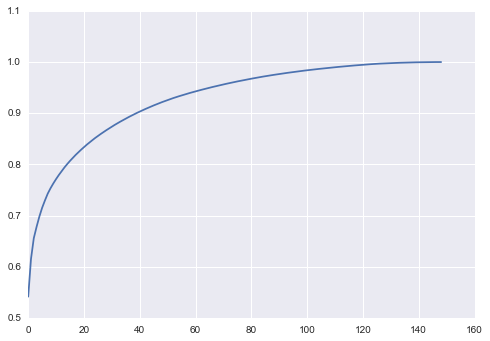

In [24]:
plt.plot(cum_sum)

In [13]:
np.sum(pca.explained_variance_ratio_)

0.69788121706079898

In [ ]:
dest_small.head()

In [ ]:
dat = filtered_train_set_10k[:100]
dat.info()

In [ ]:
dummy = pd.merge(filtered_train_set_10k,dest_small,on = 'srch_destination_id')

In [ ]:
dummy.info()

In [ ]:
filtered_train_set_10k = pd.DataFrame(dummy)

In [ ]:
filtered_train_set_10k.to_csv('../Top_10k_users.csv.gzip',compression='gzip',index=False)

In [ ]:
shortlist_users =[]
for c in user_id_100:
    print c
    break
    if c == 1:
        shortlist_users.append()
print shortlist_users

In [ ]:
test_set = pd.read_csv('test.csv')

In [ ]:
test_set.info()

# Top 10000 Users

In [1]:
%matplotlib inline
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
from sklearn import naive_bayes
import operator
from pprint import pprint
from sklearn.decomposition import PCA
import time
from multiprocessing.dummy import Pool as ThreadPool 

In [80]:
filtered_data = pd.read_csv('../Top_10k_users.csv')

In [ ]:
#test_data = pd.read_csv('../test.csv')

In [ ]:
#destinations_data = pd.read_csv('../destinations.csv')

## Randomly permute data before proceeding further and filter users with atleast 10 records

In [81]:
s = filtered_data['user_id'].value_counts()
users_records_10 = s[s >= 10].index

In [82]:
print users_records_10

Int64Index([1187360,  783124,   96700,  685462,   42680, 1011295,   52390,
             734404,   73437, 1067676,
            ...
            1131265,  312984,  770891,   52878,  559098,  381135,  453337,
             919526,  870282,  210530],
           dtype='int64', length=7221)


In [85]:
filtered_data = filtered_data[filtered_data['user_id'].isin(users_records_10)]
filtered_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1682116 entries, 0 to 1684468
Data columns (total 33 columns):
date_time                         1682116 non-null object
site_name                         1682116 non-null int64
posa_continent                    1682116 non-null int64
user_location_country             1682116 non-null int64
user_location_region              1682116 non-null int64
user_location_city                1682116 non-null int64
orig_destination_distance         1682116 non-null float64
user_id                           1682116 non-null int64
is_mobile                         1682116 non-null int64
is_package                        1682116 non-null int64
channel                           1682116 non-null int64
srch_ci                           1682116 non-null object
srch_co                           1682116 non-null object
srch_adults_cnt                   1682116 non-null int64
srch_children_cnt                 1682116 non-null int64
srch_rm_cnt                

In [86]:
filtered_data = filtered_data.iloc[np.random.permutation(len(filtered_data))]

In [87]:
X_columns = filtered_data.columns

In [88]:
X_columns = X_columns.drop(['hotel_cluster','date_time','srch_ci','srch_co','dest1','dest2','dest3','is_booking']).astype(list)
print X_columns

Index([u'site_name', u'posa_continent', u'user_location_country',
       u'user_location_region', u'user_location_city',
       u'orig_destination_distance', u'user_id', u'is_mobile', u'is_package',
       u'channel', u'srch_adults_cnt', u'srch_children_cnt', u'srch_rm_cnt',
       u'srch_destination_id', u'srch_destination_type_id', u'cnt',
       u'hotel_continent', u'hotel_country', u'hotel_market', u'num_days',
       u'num_days_to_checkin', u'month', u'log2_orig_destination_distance',
       u'log1p_num_days_to_checkin', u'log1p_num_days'],
      dtype='object')


In [5]:
def content_based_nbc (X,Y,X_test,Y_test):
    gnb = naive_bayes.GaussianNB()
    y_predict = gnb.fit(X,Y).predict(X_test)
    y_predict_pb = gnb.predict_proba(X_test)
    accuracy_top = 0.0
    Y_predicted_top = pd.DataFrame(columns=['cb_recommendations'])
    for i in range(len(y_predict_pb)):
        ordered ={}
        ordered['cb_recommendations'] =\
            sorted(zip (gnb.classes_,y_predict_pb[i]), key= operator.itemgetter(1),reverse=True)[0:5]
        Y_predicted_top = Y_predicted_top.append(ordered,ignore_index = True)
        accuracy_top += (Y_test[i] in dict(ordered['cb_recommendations']).keys())
        #break
        #print "From Top %s,%s,%s" %(ordered[0][0],y_predict[i],Y[i])
    '''%xdel gnb
    %xdel y_predict_pb
    %xdel y_predict
    %xdel ordered'''
    accuracy = (Y_test == y_predict).sum()*1.0
    #accuracy_top = accuracy_top*1.0/len(X_test)
    #print accuracy,accuracy_top
    return (accuracy,accuracy_top,Y_predicted_top)

In [6]:
print "Before dropping na", len(filtered_data)#, len(test_data)
#filtered_data['orig_destination_distance'] = filtered_data['orig_destination_distance'].fillna(-1)
filtered_data = filtered_data.dropna()
#test_data = test_data.dropna()
filtered_data = filtered_data.reset_index(drop=True)
#test_data = test_data.reset_index(drop=True)
print "After dropping na", len(filtered_data)#, len(test_data)
#filtered_data = filtered_data[filtered_data['num_days']>=0]

Before dropping na 1684469
After dropping na 1684469


In [ ]:
def get_recommendations(test_users_grouped):
    predictions = pd.DataFrame(columns=['id','hotel_cluster'])
    for user,filtered_test in test_users_grouped:
        try:
            filtered_train = train_grouped.get_group(user)
            
            filtered_train = filtered_train.fillna(0)
            filtered_train = filtered_train.reset_index(drop=True)

            filtered_test = filtered_test.fillna(0)
            filtered_test = filtered_test.reset_index(drop=True)

            X_train = filtered_train[columns]
            Y_train = filtered_train['hotel_cluster']
            X_test = filtered_test[columns]
            X_test_id = filtered_test['id'].astype(int)
            if len(X_train) < 1:
                print "No training data"
                continue
            if len(X_test) < 1:
                print "No test data"
                continue
            pred_dict = {}
            Y_predicted_top = content_based_nbc(X_train,Y_train,X_test)
            for i in range(len(X_test)):
                pred_dict['id'] = int(X_test_id[i])
                pred_dict['hotel_cluster'] = ' '.join([str(x) for x in Y_predicted_top[i]])
                predictions = predictions.append(pred_dict,ignore_index=True)
                #pprint(pred_dict)
            #pprint(Y_predicted_top)
            %xdel X_train
            %xdel X_test
            %xdel Y_train
            %xdel Y_predicted_top
        except ValueError as e:
            print e, user
    predictions.to_csv('predictions_group.csv',index=False)

In [110]:
users = filtered_data['user_id'].unique()
print "Number of unique users: ",len(users)

Number of unique users:  7221


In [98]:
def k_fold(filtered_data, k=5):
    accuracy = {}
    avg_accuracy = 0.0
    avg_accuracy_top = 0.0
    
    #users = filtered_data['user_id'].unique()
    filtered_with_recommendations = pd.DataFrame(columns =list(X_columns) + ['hotel_cluster','cb_recommendations'])
    #print len(users)
    filtered_data_grouped = filtered_data.groupby('user_id')
    print len(filtered_data_grouped)
    #for user in users:
    for user,filtered in filtered_data_grouped:
        try:
            filtered_with_recommendations_user = pd.DataFrame(columns =list(X_columns) + \
                                                              ['hotel_cluster','cb_recommendations'])
            '''filtered = filtered_data[filtered_data['user_id'] == user]

            filtered = filtered.dropna()'''
            filtered = filtered.reset_index(drop=True)
            
            fold_size = len(filtered)/k
            
            avg_accuracy_user = 0.0
            avg_accuracy_top_user = 0.0
            
            skipped_folds = 0
            for i in range(k):
                filtered_train = filtered[:fold_size*(i)].append(filtered[fold_size*(i+1):])
                filtered_test =  filtered[fold_size*(i):fold_size*(i+1)]
                
                filtered_train = filtered_train.reset_index(drop=True)
                filtered_test = filtered_test.reset_index(drop=True)
               
                X_train = filtered_train[X_columns]
                Y_train = filtered_train['hotel_cluster']
                
                X_test = filtered_test[X_columns]
                Y_test = filtered_test['hotel_cluster']
                
                #print X_train.shape, Y_train.shape
                #print X_test.shape, Y_test.shape
                #break
                
                if len(X_train) < 1:
                    skipped_folds +=1
                    #print fold_size, len(filtered)
                    #print "No training data"
                    continue
                if len(X_test) < 1:
                    skipped_folds +=1
                    #print fold_size, len(filtered)
                    #print "No test data"
                    continue
                
                acc,acc_top,Y_predicted_top = content_based_nbc(X_train,Y_train,X_test,Y_test)
                accuracy[user] = acc
                avg_accuracy_user += acc
                avg_accuracy_top_user += acc_top
            if k != skipped_folds:
                avg_accuracy += avg_accuracy_user*1.0/(k-skipped_folds)
                avg_accuracy_top += avg_accuracy_top_user*1.0/(k-skipped_folds)

            #break
        except ValueError as e:
            print e, user
    print avg_accuracy*1.0/len(users),avg_accuracy_top*1.0/len(users)

In [19]:
def get_cb_recommendations(train_set,test_set):
    accuracy = {}
    avg_accuracy = 0.0
    avg_accuracy_top = 0.0

    filtered_with_recommendations = pd.DataFrame(columns = list(X_columns) + ['hotel_cluster','cb_recommendations'])
    Y_predicted_top = pd.DataFrame(columns=['cb_recommendations'])
    #print len(users)
    train_set_grouped = train_set.groupby('user_id')
    test_set_grouped = test_set.groupby('user_id')
    
    for user,filtered_test in test_set_grouped:
        try:
            filtered_with_recommendations_user = pd.DataFrame(columns = list(X_columns) +\
                                                              ['hotel_cluster','cb_recommendations'])
            filtered_train = train_set_grouped.get_group(user)
            
            #filtered_train = filtered_train.dropna()
            filtered_train = filtered_train.reset_index(drop=True)

            #filtered_test = filtered_test.dropna()
            filtered_test = filtered_test.reset_index(drop=True)

            X_train = filtered_train[X_columns]
            Y_train = filtered_train['hotel_cluster']
            
            X_test = filtered_test[X_columns]
            Y_test = filtered_test['hotel_cluster']
            
            if len(X_train) < 1:
                print "No training data"
                continue
            if len(X_test) < 1:
                print "No test data"
                continue
            #return values from the NBC model
            acc,acc_top,Y_predicted_top = content_based_nbc(X_train,Y_train,X_test,Y_test)
            
            filtered_with_recommendations_user = pd.concat([X_test,Y_test,Y_predicted_top],axis=1)
            filtered_with_recommendations = \
                pd.concat([filtered_with_recommendations,filtered_with_recommendations_user],axis=0,ignore_index=True)
            #print len(X_test),len(Y_test),len(Y_predicted_top),len(filtered_with_recommendations)
            
            accuracy[user] = acc
            avg_accuracy += acc
            avg_accuracy_top += acc_top
            #break
        except ValueError as e:
            print e, user
            
    print avg_accuracy*1.0/len(filtered_with_recommendations)
    print avg_accuracy_top*1.0/len(filtered_with_recommendations)
    return filtered_with_recommendations

In [27]:
curr_time  = datetime.fromtimestamp(int(time.time()))
print curr_time

2016-05-11 19:18:53


In [28]:
filtered_data_with_recos = get_cb_recommendations(filtered_data,filtered_data)

0.377816985649
0.7800529425


In [48]:
filtered_data_with_recos = get_cb_recommendations(filtered_data[:1000],filtered_data[:1000])

0.77
0.956


site_name


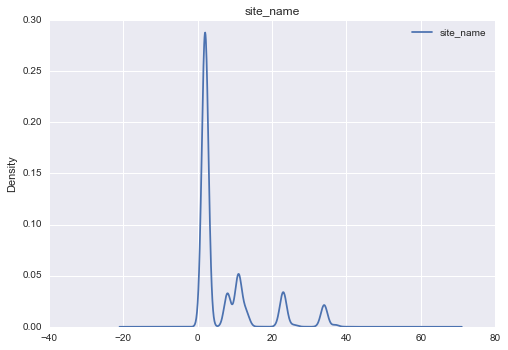

posa_continent


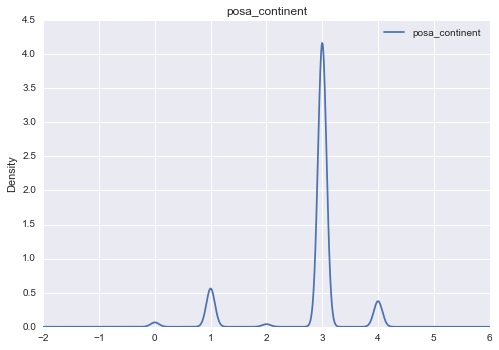

user_location_country


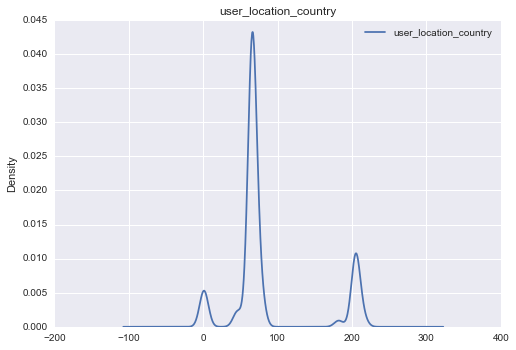

user_location_region


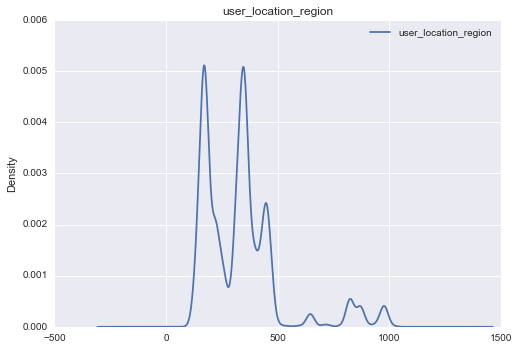

user_location_city


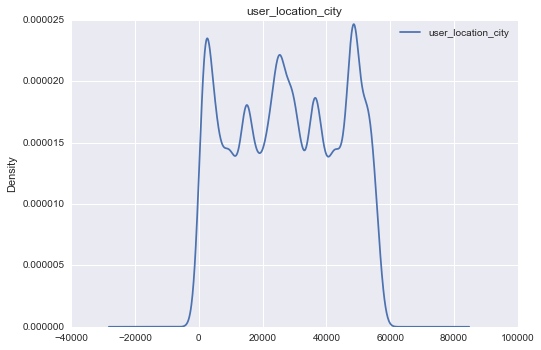

orig_destination_distance


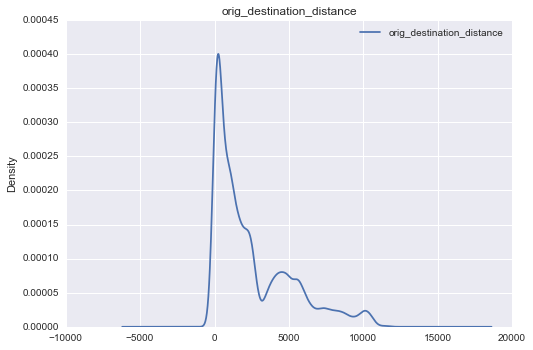

user_id


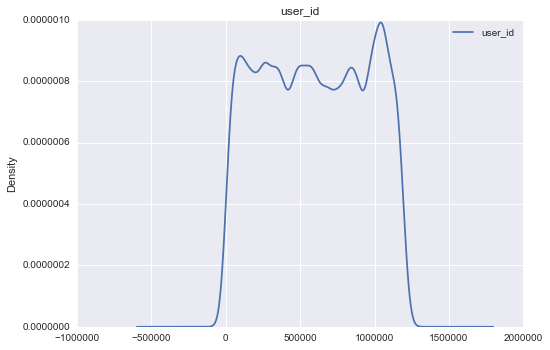

is_mobile


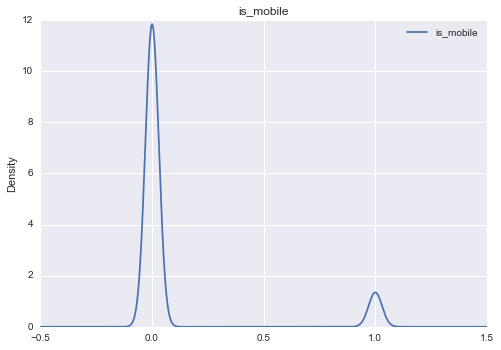

is_package


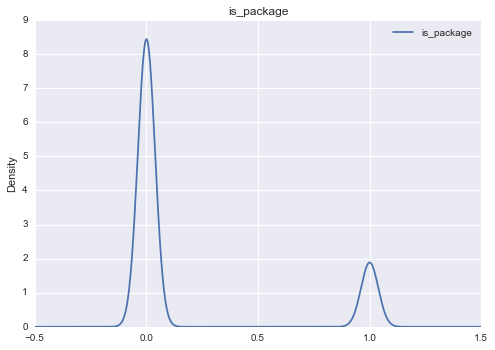

channel


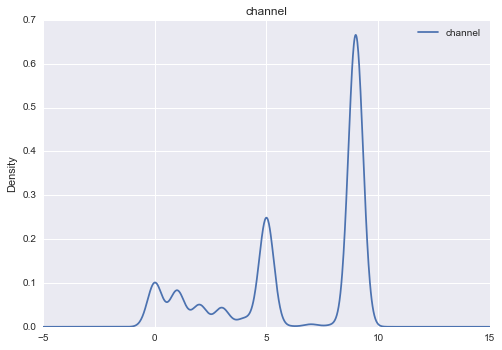

srch_adults_cnt


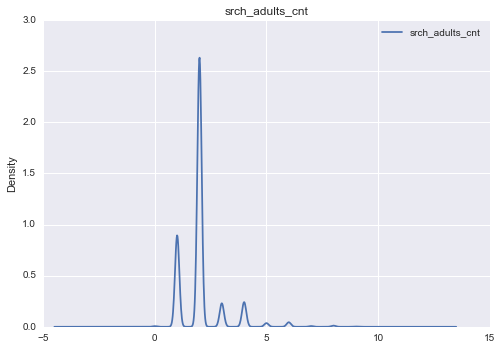

srch_children_cnt


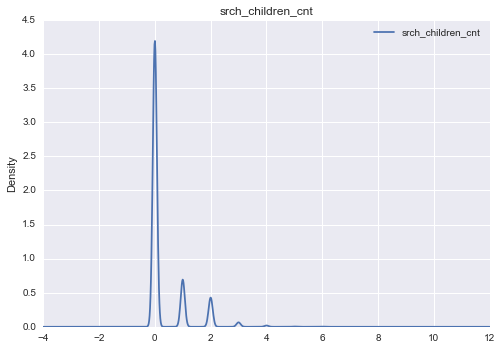

srch_rm_cnt


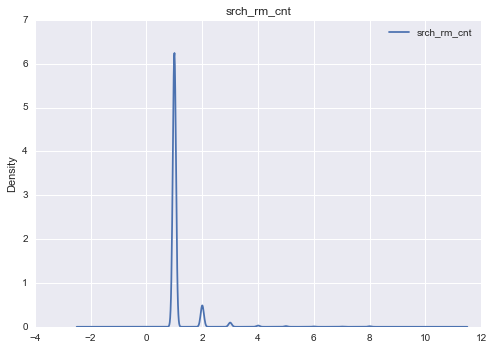

srch_destination_id


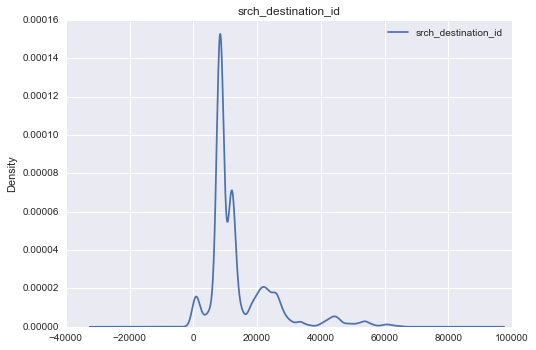

srch_destination_type_id


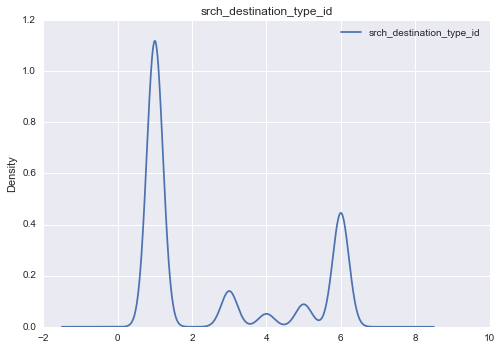

cnt


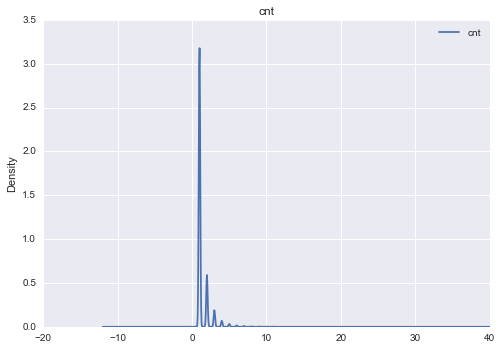

hotel_continent


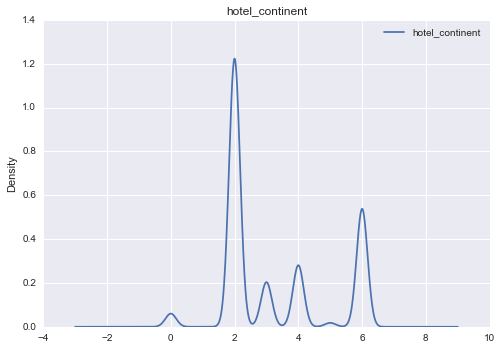

hotel_country


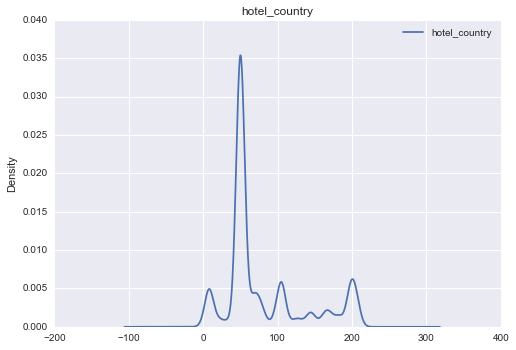

hotel_market


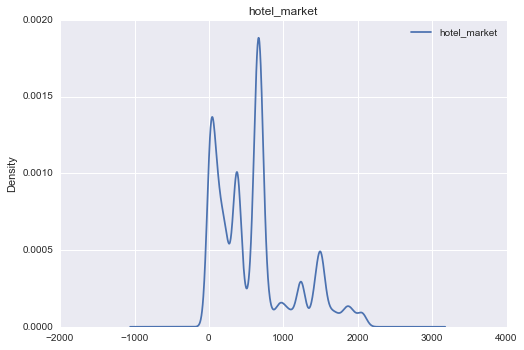

num_days


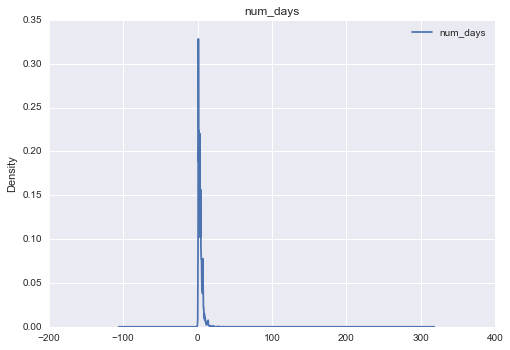

num_days_to_checkin


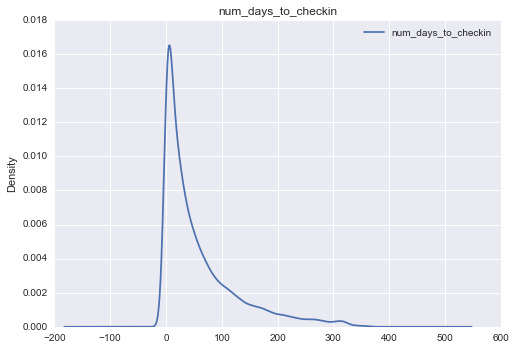

month


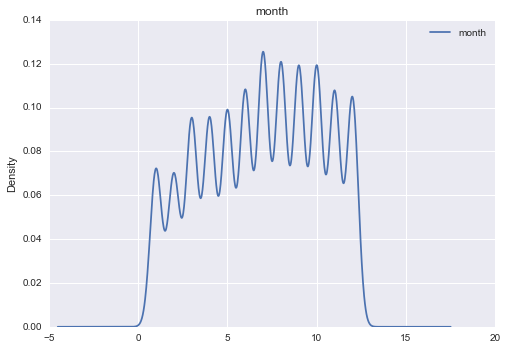

log2_orig_destination_distance


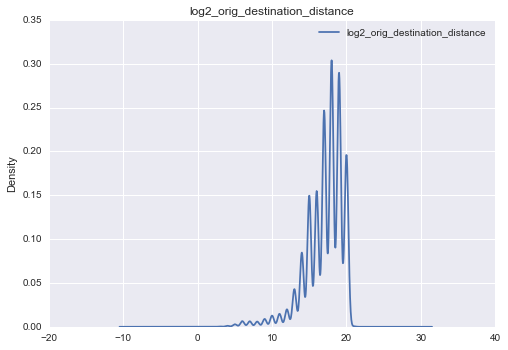

log1p_num_days_to_checkin


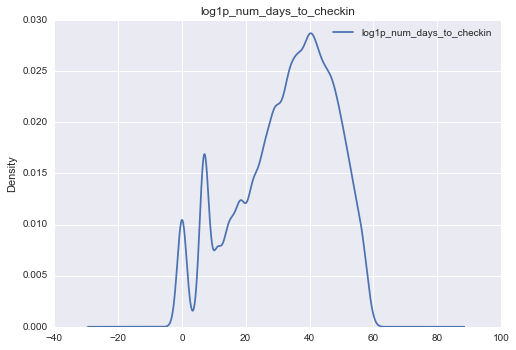

log1p_num_days


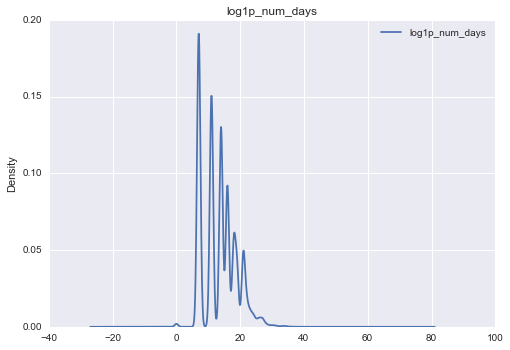

In [108]:
for col in X_columns:
    try:
        k = filtered_data[col][:100000].plot(kind='kde',title = col,legend = True)
        print col
        plt.savefig(col +'.png')
        plt.show()
        #break
    except TypeError as e:
        print col
        continue